In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### EDA for Weather Data

In [5]:
weather_df = pd.read_csv('monthly_weather_data.csv')
weather_df.head()

,district,month,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year
0,Adilabad,Apr,0.421579,25.683860,39.596491,19.607018,55.286842,0.171190,16.647212,2018
1,Adilabad,Aug,15.750764,23.729881,29.817487,72.372835,92.240577,0.711311,15.942190,2018
2,Adilabad,Dec,0.314921,14.151937,28.375753,43.218221,88.748637,0.102105,7.016992,2018
3,Adilabad,Feb,0.608083,17.213722,33.474436,25.258835,66.959774,0.147619,11.622817,2018
4,Adilabad,Jan,0.000000,12.460951,31.436757,23.637521,69.652971,0.073835,9.502509,2018


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        285 non-null    object 
 1   month           285 non-null    object 
 2   cumm_rainfall   285 non-null    float64
 3   temp_min        285 non-null    float64
 4   temp_max        285 non-null    float64
 5   humidity_min    285 non-null    float64
 6   humidity_max    285 non-null    float64
 7   wind_speed_min  263 non-null    float64
 8   wind_speed_max  273 non-null    float64
 9   year            285 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 22.4+ KB


In [7]:
weather_df.isna().sum()

district           0
month              0
cumm_rainfall      0
temp_min           0
temp_max           0
humidity_min       0
humidity_max       0
wind_speed_min    22
wind_speed_max    12
year               0
dtype: int64

In [8]:
# filling NA values with avg of the same month
weather_df['wind_speed_min'].fillna(weather_df.groupby(by=["district", "month"])['wind_speed_min'].transform(
    'mean').fillna(weather_df.wind_speed_min.mean()), inplace=True)
weather_df['wind_speed_max'].fillna(weather_df.groupby(by=["district", "month"])['wind_speed_max'].transform(
    'mean').fillna(weather_df.wind_speed_max.mean()), inplace=True)
    
weather_df.isna().sum()

district          0
month             0
cumm_rainfall     0
temp_min          0
temp_max          0
humidity_min      0
humidity_max      0
wind_speed_min    0
wind_speed_max    0
year              0
dtype: int64

#### AQI EDA

In [9]:
aqi_df = pd.read_csv("monthly_aqi_data.csv")
aqi_df.head()

,district,month,aqi,year
0,Nizamabad,Jan,61.333333333333336,2017
1,Nizamabad,Feb,61.55555555555556,2017
2,Nizamabad,Mar,63.22222222222222,2017
3,Nizamabad,Apr,67.37037037037038,2017
4,Nizamabad,May,68.40740740740742,2017


In [10]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  360 non-null    object
 1   month     360 non-null    object
 2   aqi       360 non-null    object
 3   year      360 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.4+ KB


In [11]:
aqi_df['aqi'] = pd.to_numeric(aqi_df.aqi, errors="coerce")
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  360 non-null    object 
 1   month     360 non-null    object 
 2   aqi       345 non-null    float64
 3   year      360 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 11.4+ KB


In [12]:
aqi_df.isna().sum()

district     0
month        0
aqi         15
year         0
dtype: int64

In [13]:
df = pd.merge(weather_df, aqi_df, on=['district', 'month', 'year'])
df.head()

,district,month,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year,aqi
0,Adilabad,Apr,0.421579,25.683860,39.596491,19.607018,55.286842,0.171190,16.647212,2018,73.518519
1,Adilabad,Aug,15.750764,23.729881,29.817487,72.372835,92.240577,0.711311,15.942190,2018,64.000000
2,Adilabad,Dec,0.314921,14.151937,28.375753,43.218221,88.748637,0.102105,7.016992,2018,81.000000
3,Adilabad,Feb,0.608083,17.213722,33.474436,25.258835,66.959774,0.147619,11.622817,2018,67.000000
4,Adilabad,Jan,0.000000,12.460951,31.436757,23.637521,69.652971,0.073835,9.502509,2018,66.111111


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        285 non-null    object 
 1   month           285 non-null    object 
 2   cumm_rainfall   285 non-null    float64
 3   temp_min        285 non-null    float64
 4   temp_max        285 non-null    float64
 5   humidity_min    285 non-null    float64
 6   humidity_max    285 non-null    float64
 7   wind_speed_min  285 non-null    float64
 8   wind_speed_max  285 non-null    float64
 9   year            285 non-null    int64  
 10  aqi             270 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 26.7+ KB


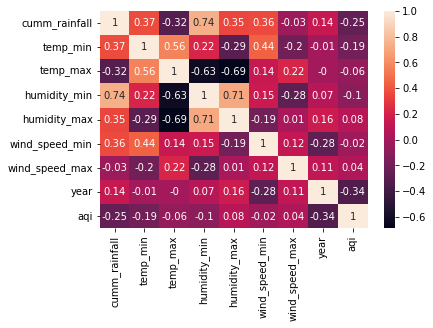

In [15]:
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

In [16]:
industry_df = pd.read_csv("monthly_industry_consumption_data.csv")
industry_df.head()

,district,month,units,load,year
0,Adilabad,Apr,586815.0,27357.062,2019
1,Adilabad,Aug,352599.0,27437.062,2019
2,Adilabad,Dec,738218.0,27605.062,2019
3,Adilabad,Feb,780964.0,27265.642,2019
4,Adilabad,Jan,803019.0,27154.642,2019


In [17]:
df = pd.merge(df, industry_df, on=["district", "month", "year"])
df.head()

,district,month,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,year,aqi,units,load
0,Adilabad,Apr,0.219565,26.981594,40.817391,17.355942,50.242464,0.164091,12.836970,2019,78.000000,586815.0,27357.062
1,Adilabad,Aug,8.233692,24.144265,30.264875,73.648387,96.310932,0.520789,10.230466,2019,79.000000,352599.0,27437.062
2,Adilabad,Dec,0.022939,15.835484,28.842294,49.891308,93.605287,0.053943,5.470251,2019,73.370370,738218.0,27605.062
3,Adilabad,Feb,0.018478,16.938354,33.292857,27.538509,71.907298,0.067045,10.352110,2019,76.777778,780964.0,27265.642
4,Adilabad,Jan,0.130856,12.201262,29.281907,33.557363,83.543058,0.082698,7.256012,2019,76.333333,803019.0,27154.642


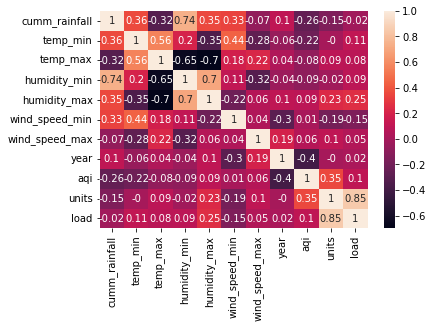

In [18]:
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

<AxesSubplot:xlabel='year', ylabel='aqi'>

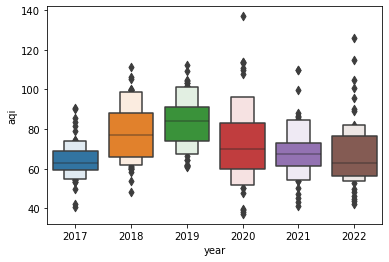

In [33]:
sns.boxenplot(data=aqi_df, x='year', y="aqi")